In [75]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('no_outliers/pow_cons_new1.csv')
data.drop(columns='Unnamed: 0',axis=1,inplace=True)
data.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,date_time,meterings
0,3.322,0.204,238.70,14.2,2009-04-13 21:18:00,35.0
1,0.328,0.232,241.38,1.6,2008-05-17 03:59:00,1.0
2,0.298,0.112,245.59,1.2,2007-01-24 01:41:00,0.0
3,0.082,0.000,241.01,0.2,2008-08-25 23:04:00,1.0
4,0.336,0.078,245.62,1.4,2008-12-18 04:44:00,1.0


In [5]:
data.set_index('date_time',inplace=True)

In [6]:
data.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,meterings
date_time,,,,,
2009-04-13 21:18:00,3.322,0.204,238.70,14.2,35.0
2008-05-17 03:59:00,0.328,0.232,241.38,1.6,1.0
2007-01-24 01:41:00,0.298,0.112,245.59,1.2,0.0
2008-08-25 23:04:00,0.082,0.000,241.01,0.2,1.0
2008-12-18 04:44:00,0.336,0.078,245.62,1.4,1.0


In [89]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,:-1], data.meterings,test_size=0.10,random_state=42)

In [90]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X_train)
scaler.mean_

array([9.98172416e-01, 1.22770394e-01, 2.40975374e+02, 4.22938952e+00])

In [91]:
X_scaled = scaler.transform(X_train)

In [92]:
X_scaled

array([[-0.94534874, -1.09864711, -0.14491077, -0.97644227],
       [-0.47502174,  1.63968421,  0.64746621, -0.43836706],
       [-0.81257701, -0.29325555,  0.59655042, -0.81501971],
       ...,
       [-0.78332222, -0.25746037, -1.29688051, -0.81501971],
       [ 1.38828332, -1.09864711, -0.37084959,  1.33728115],
       [ 0.48363521, -0.11427964,  0.79066687,  0.42255328]])

In [96]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_scaled, y_train)
ypred = lr.predict(X_test)

In [97]:
reg.score(X_scaled,y_train)

0.6127162028896848

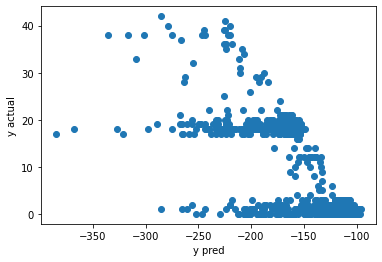

In [98]:
plt.scatter(ypred,y_test)
plt.xlabel('y pred')
plt.ylabel('y actual')
plt.show()

In [99]:
from sklearn.preprocessing import StandardScaler
numeric=['Global_active_power','Global_reactive_power','Voltage','Global_intensity']
sc = StandardScaler()
X_train[numeric]=sc.fit_transform(X_train[numeric])
X_test[numeric]=sc.transform(X_test[numeric])

In [100]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

#Create a LinearRegression object
lr= LinearRegression()
#Fit X and y 
lr.fit(X_train, y_train)
ypred = lr.predict(X_test)
#Metrics to evaluate your model 
r2_score(y_test, ypred), mean_absolute_error(y_test, ypred), np.sqrt(mean_squared_error(y_test, ypred))

(0.5728681122125281, 4.046132731646083, 6.006699821934049)

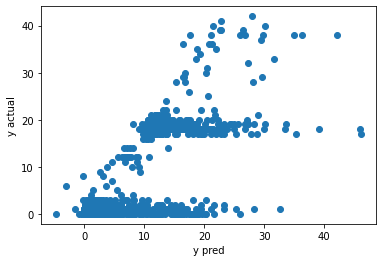

In [101]:
plt.scatter(ypred,y_test)
plt.xlabel('y pred')
plt.ylabel('y actual')
plt.show()

It is predicticting somewhat linearly, but its really bad!
### Trying SVR

In [102]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [123]:
regr = make_pipeline(StandardScaler(), SVR(C=5000.0, epsilon=1))
regr.fit(X_scaled, y_train)
regr.score(X_scaled,y_train)

0.6956321008310398

In [124]:
r2_score(y_test, y_pred), mean_absolute_error(y_test, ypred), np.sqrt(mean_squared_error(y_test, ypred))

(0.6449446183825562, 4.046132731646083, 6.006699821934049)

In [125]:
y_pred = regr.predict(X_test)

C:\Users\athar\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


<AxesSubplot:ylabel='meterings'>

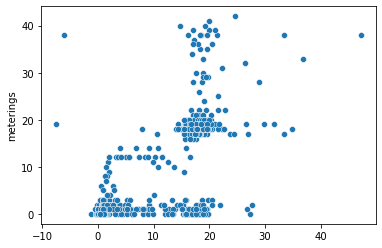

In [126]:
sns.scatterplot(x=y_pred,y=y_test)

In [142]:
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_lin = SVR(kernel='linear', C=1e3)
svr_poly = SVR(kernel='poly', C=1e3, degree=2)
y_rbf = svr_rbf.fit(X_train['Global_active_power'], y_train).predict(X_test)
y_lin = svr_lin.fit(X_train['Global_active_power'], y_train).predict(X_test)
y_poly = svr_poly.fit(X_train['Global_active_power'], y_train).predict(X_test)

ValueError: Expected 2D array, got 1D array instead:
array=[-0.94534874 -0.47502174 -0.81257701 ... -0.78332222  1.38828332
  0.48363521].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


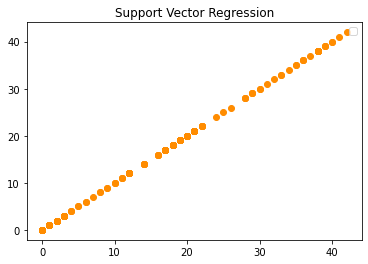

In [141]:
lw = 2
# plt.scatter(X_scaled, y_test, color='darkorange')
# plt.hold('on')
plt.plot(X_sca, y_rbf, color='navy', lw=lw, label='RBF model')
plt.plot(X_scaled, y_lin, color='c', lw=lw, label='Linear model')
plt.plot(X_scaled, y_poly, color='cornflowerblue', lw=lw, label='Polynomial model')
plt.xlabel('data')
plt.ylabel('target')
plt.title('Support Vector Regression')
plt.legend()
plt.show()

In [137]:
y

array([32.94488952, 29.04175282,  0.48147993, ..., 13.1950296 ,
        1.8143907 ,  2.71097995])